In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import torch.utils.data
from torch.autograd import Variable
from tqdm import tqdm
import matplotlib.pyplot as plt
import joblib

In [2]:
torch.cuda.is_available()

True

In [3]:
from isaac.utils import plot_confusion_matrix
from isaac.dataset import read_dataset, prepare_dataset, normalise
from isaac.training import evaluate, evaluate_saved_model
from isaac.models import RNNModel, ComplexRNNModel
from isaac.constants import BASIC_TRAINING_COLS, FORCE_CLASS_COLS, MASS_CLASS_COLS

In [4]:
INPUT_DIM = len(BASIC_TRAINING_COLS)    # input dimension
HIDDEN_DIM = 25  # hidden layer dimension
N_LAYERS = 4     # number of hidden layers
OUTPUT_DIM = 3   # output dimension
DROPOUT = 0.5

network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM)

NORMALISE_DATA = True
STEP_SIZE = 2
SEQ_END = 1800

# MASS TESTING

100%|██████████| 196/196 [00:00<00:00, 1048.65it/s]


Model's accuracy on test set: 54.59183673469388
data/passive_trials_exp1.h5


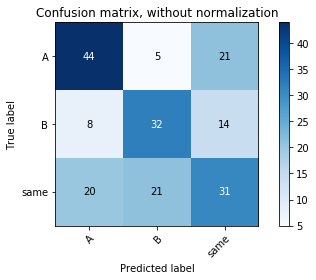

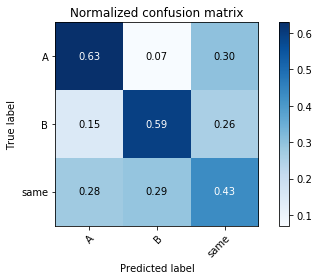

100%|██████████| 143/143 [00:00<00:00, 1067.36it/s]


Model's accuracy on test set: 48.95104895104895
data/yoked_trials_exp1.h5


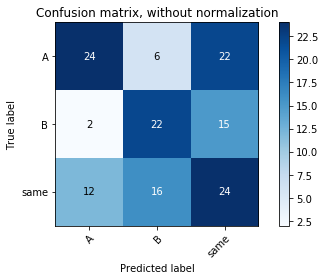

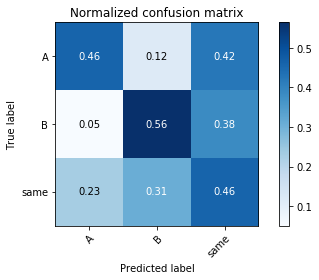

100%|██████████| 399/399 [00:00<00:00, 1093.36it/s]


Model's accuracy on test set: 49.87468671679198
data/mass_trials_exp2.h5


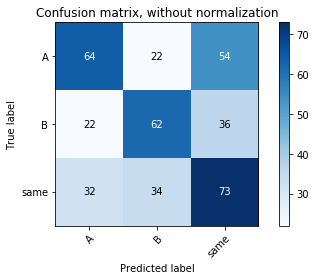

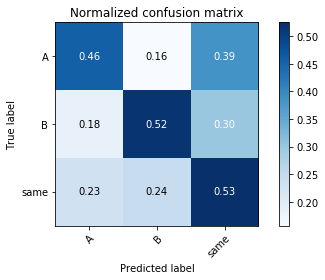

100%|██████████| 399/399 [00:00<00:00, 1046.81it/s]


Model's accuracy on test set: 41.35338345864662
data/force_trials_exp2.h5


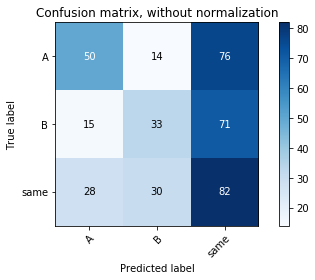

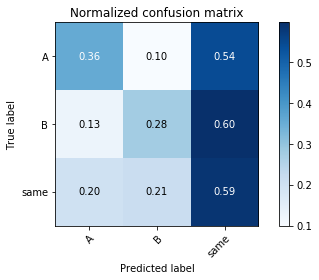

In [5]:
model_path = "models/passive_mass_model.pt"
scaler_path = "scalers/passive_mass_scaler.sk"
network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM, DROPOUT)
class_columns = MASS_CLASS_COLS


for test_dataset_path in ["data/passive_trials_exp1.h5", "data/yoked_trials_exp1.h5", 
                          "data/mass_trials_exp2.h5", "data/force_trials_exp2.h5"]:
    evaluate_saved_model(model_path, network_dims, test_dataset_path, BASIC_TRAINING_COLS,
                         class_columns, step_size=STEP_SIZE, scaler_path=scaler_path)
    print(test_dataset_path)
    plt.show()

# FORCE TESTING

100%|██████████| 196/196 [00:00<00:00, 1076.58it/s]


Model's accuracy on test set: 53.57142857142857
data/passive_trials_exp1.h5


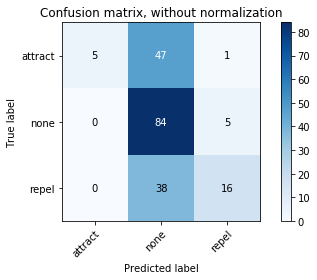

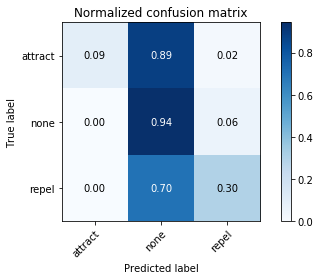

100%|██████████| 143/143 [00:00<00:00, 1009.39it/s]


Model's accuracy on test set: 48.25174825174825
data/yoked_trials_exp1.h5


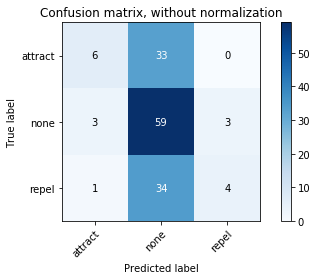

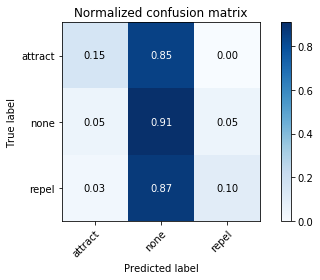

100%|██████████| 399/399 [00:00<00:00, 1091.23it/s]


Model's accuracy on test set: 38.34586466165413
data/mass_trials_exp2.h5


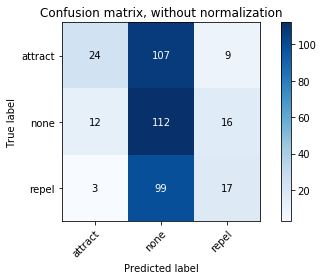

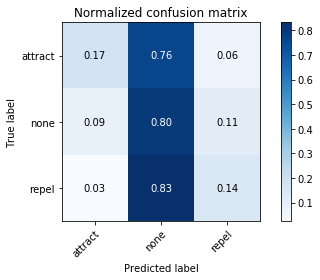

100%|██████████| 399/399 [00:00<00:00, 1100.40it/s]


Model's accuracy on test set: 41.35338345864662
data/force_trials_exp2.h5


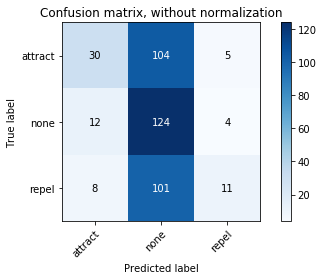

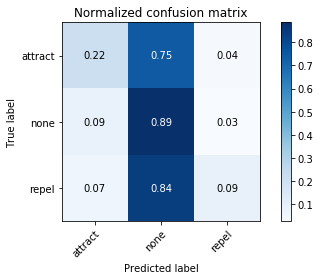

In [6]:
model_path = "models/passive_force_model.pt"
scaler_path = "scalers/passive_force_scaler.sk"
network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM, DROPOUT)
class_columns = FORCE_CLASS_COLS

for test_dataset_path in ["data/passive_trials_exp1.h5", "data/yoked_trials_exp1.h5", 
                          "data/mass_trials_exp2.h5", "data/force_trials_exp2.h5"]:

    evaluate_saved_model(model_path, network_dims, test_dataset_path, BASIC_TRAINING_COLS,
                         class_columns, step_size=STEP_SIZE, scaler_path=scaler_path)
    print(test_dataset_path)
    plt.show()